# Project 2: Ames Iowa Housing Model - Kaggle Challenge

### Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics

%config InlineBackend.figure_format='retina'

### Explore the Data

In [18]:
ames = pd.read_csv('./datasets/train.csv')

In [19]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [20]:
ames.columns = ames.columns.str.lower().str.replace(' ', '_')


In [21]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [22]:
#Check for nulls - first 50 columns:
ames.isnull().sum().head(50)

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

In [23]:
#Check for nulls - last 35 columns:
ames.isnull().sum().tail(35)

low_qual_fin_sf       0
gr_liv_area           0
bsmt_full_bath        2
bsmt_half_bath        2
full_bath             0
half_bath             0
bedroom_abvgr         0
kitchen_abvgr         0
kitchen_qual          0
totrms_abvgrd         0
functional            0
fireplaces            0
fireplace_qu       1000
garage_type         113
garage_yr_blt       114
garage_finish       114
garage_cars           1
garage_area           1
garage_qual         114
garage_cond         114
paved_drive           0
wood_deck_sf          0
open_porch_sf         0
enclosed_porch        0
3ssn_porch            0
screen_porch          0
pool_area             0
pool_qc            2042
fence              1651
misc_feature       1986
misc_val              0
mo_sold               0
yr_sold               0
sale_type             0
saleprice             0
dtype: int64

In [24]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [25]:
# Looking at frequency of values for various columns:
#ames['ms_subclass'].value_counts() # Use individual components of this rather than this summarized metric +
#ames['ms_zoning'].value_counts(dropna=False) # Dummify top 3, roll together rest +
#ames['street'].value_counts() # Only 7 unpaved
#ames['alley'].value_counts(na=False) # Almost all null. Only 140 observations. 
#ames['lot_shape'].value_counts(dropna=False) # Reg 63%, Irreg 37% - Roll Irregs together if using +
#ames['land_contour'].value_counts(dropna=False) # Very few non-flat properties
#ames['land_slope'].value_counts(dropna=False) # 98 mod-severe slopes = 4% of data - too unbalanced
#ames['utilities'].value_counts(dropna=False) # Don't use, everyone has utilities
#ames['lot_config'].value_counts(dropna=False) # Inside, Corner, CulDSac could be interesting to Dummify +
#ames['neighborhood'].value_counts(normalize=True, dropna=False) # 28 neighborhoods, maybe dummify? +
#len(ames['neighborhood'].unique())
#ames['condition_1'].value_counts(normalize=True, dropna=False) # 15% have conditions, pull out RR? +
#ames['condition_2'].value_counts(normalize=True, dropna=False) # 98 of properties have no secondary conditions
#ames['bldg_type'].value_counts(normalize=True, dropna=False) # 83% Sing fam. Compare to ms_subclass. +
# ames['house_style'].value_counts(normalize=True, dropna=False) # Compare to sm_subclass. Seems to be rollup +
# ames['overall_qual'].value_counts(normalize=True, dropna=False) # Most are 5-8. Bell curve. 
# ames['overall_cond'].value_counts(normalize=True, dropna=False) # Most are 5-7, no 10's.
# ames['year_built'].value_counts(normalize=True, dropna=False) # Consider bucketing, creating house age +
# ames['roof_style'].value_counts(normalize=True, dropna=False) # All Gable or Hip. Not likely predictive. 
# ames['roof_matl'].value_counts(normalize=True, dropna=False) # 98% CompShg - don't use
# ames['exterior_1st'].value_counts(normalize=True, dropna=False) # 15 values. Seems unlikely to be predictive
# ames['foundation'].value_counts(normalize=True, dropna=False) # 6 values, 3 with 98%. Unlikely to be predictive. 
# ames['bsmt_qual'].value_counts(normalize=True, dropna=False) # basement height - not likely predictive
# ames['bsmt_cond'].value_counts(normalize=True, dropna=False) # 96% Fair, Typical or Good - binarize if used +
ames['bsmtfin_type_1'].value_counts(normalize=True, dropna=False) # could be interesting dummies or binary +
# ames['heating'].value_counts(normalize=True, dropna=False) # 98% GasA
# ames['central_air'].value_counts(normalize=True, dropna=False) # 93% yes - could be predictive because Iowas gets HOT +
# ames['bsmt_full_bath'].value_counts(normalize=True, dropna=False) # Create a total bathrooms column +
# ames['garage_type'].value_counts(dropna=False) # 6 types plus nulls. Nulls probably mean no garage. Replace with "None"
ames['garage_cars'].value_counts(dropna=False) # roll together into 0, 1, 2, 3+ if using. Get rid of 1 null.
# ames['paved_drive'].value_counts(normalize=True,dropna=False) # 90% paved. Could be predictive, but unlikely.
# ames['pool_qc'].value_counts(normalize=True,dropna=False) # 99% no pool. If used, turn into boolean Pool Y/N
# ames['fence'].value_counts(normalize=True,dropna=False) # 80% no fence. If used, turn into boolean Fence Y/N
# ames['bedroom_abvgr'].value_counts(dropna=False)
# ames['kitchen_abvgr'].value_counts(dropna=False) # Are these houses with multple kitchens?
# ames['totrms_abvgrd'].value_counts(normalize=True, dropna=False) # Could be predictive
# ames['fireplaces'].value_counts(normalize=True, dropna=False) # Turn into binary?
# ames['functional'].value_counts(normalize=True, dropna=False) # 93% are typical functionality. Might be predictive? Make binary?
# ames['misc_feature'].value_counts(dropna=False) # 97% have none


2.0    1136
1.0     524
3.0     263
0.0     113
4.0      13
NaN       1
5.0       1
Name: garage_cars, dtype: int64

### Feature Engineering

#### Square Footage

In [26]:
# Figuring our how the square footage columns fit together.
# Based on this, I'm going to create a full square footage field that includes above ground and basement sq ft. 
# Based on this, I'm going to roll together porch fields into single sq footage field. 
ames[['1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'total_bsmt_sf', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch','pool_area']].head(30)

,1st_flr_sf,2nd_flr_sf,gr_liv_area,total_bsmt_sf,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area
0,725,754,1479,725.0,475.0,0,44,0,0,0,0
1,913,1209,2122,913.0,559.0,0,74,0,0,0,0
2,1057,0,1057,1057.0,246.0,0,52,0,0,0,0
3,744,700,1444,384.0,400.0,100,0,0,0,0,0
4,831,614,1445,676.0,484.0,0,59,0,0,0,0
5,1888,0,1888,1517.0,578.0,0,0,0,0,0,0
6,1072,0,1072,547.0,525.0,0,44,0,0,0,0
7,1188,0,1188,1188.0,531.0,0,0,0,0,0,0
8,924,0,924,924.0,420.0,0,324,0,0,0,0
9,1040,1040,2080,1040.0,504.0,335,0,0,0,0,0


In [27]:
# Create total house square footage from above ground sf and basement sf:
ames['total_house_sf'] = ames['gr_liv_area'] + ames['total_bsmt_sf']

In [28]:
# Create porch square footage from all porch columns:
ames['porch_sf'] = ames['wood_deck_sf'] + ames['open_porch_sf'] + ames['open_porch_sf'] + ames['enclosed_porch'] + ames['3ssn_porch'] + ames['screen_porch']

In [29]:
ames.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_house_sf,porch_sf
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,3,2010,WD,130500,2204.0,88
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,4,2009,WD,220000,3035.0,148
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,1,2010,WD,109000,2114.0,104
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,174000,1828.0,100
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,3,2010,WD,138500,2121.0,118


#### Bathroom Count

In [30]:
# Figuring out how bathrooms columns work together:
ames[['bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath']].head(10)

,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath
0,0.0,0.0,2,1
1,1.0,0.0,2,1
2,1.0,0.0,1,0
3,0.0,0.0,2,1
4,0.0,0.0,2,0
5,0.0,0.0,2,1
6,1.0,0.0,2,0
7,1.0,0.0,1,0
8,0.0,0.0,1,0
9,0.0,1.0,1,2


In [31]:
# Create total bathroom column:
ames['baths'] = ames['bsmt_full_bath'] + ames['full_bath'] + (ames['bsmt_half_bath'] / 2) + (ames['half_bath'] / 2)

In [32]:
ames['baths'].head(10)

0    2.5
1    3.5
2    2.0
3    2.5
4    2.0
5    2.5
6    3.0
7    2.0
8    1.0
9    2.5
Name: baths, dtype: float64

#### Lot & Zone Types

In [33]:
# Rolling low count zones together before dummifying. 

def zone_group(data):
    if data['ms_zoning'] in ('RL','RM','FV'):
        return data['ms_zoning']
    else:
        return 'OT'

In [34]:
ames['zone'] = ames.apply(lambda data: zone_group(data), axis=1)

In [35]:
ames = pd.get_dummies(data=ames, columns=['zone'])

In [36]:
# Dummify lot_config.
ames = pd.get_dummies(data=ames, columns=['lot_config'])

In [37]:
# Dropping columns for lot_confs with few observations, taking place of "drop first":
ames.drop(columns=['lot_config_FR3', 'lot_config_FR2'], inplace=True)

#### House Type, Style & Build Date

In [38]:
# Figuring out how these fields work together:
# MS Subclass is a blended metric (like a prebuilt polynomial) but since we don't know the weight of the individual elements, I'm going to use those instead.
ames['ms_subclass']

ames[['ms_subclass', 'bldg_type', 'house_style', 'year_built', 'year_remod/add']].head(30)

,ms_subclass,bldg_type,house_style,year_built,year_remod/add
0,60,1Fam,2Story,1976,2005
1,60,1Fam,2Story,1996,1997
2,20,1Fam,1Story,1953,2007
3,60,1Fam,2Story,2006,2007
4,50,1Fam,1.5Fin,1900,1993
5,20,1Fam,1Story,1966,2002
6,180,TwnhsE,SFoyer,2005,2006
7,20,1Fam,1Story,1959,1959
8,20,1Fam,1Story,1952,1952
9,60,1Fam,2Story,1969,1969


In [39]:
ames['bldg_type'].value_counts()

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: bldg_type, dtype: int64

In [40]:
# Create three buckets for building type, then dummify:
def building(data):
    if data['bldg_type'] == '1Fam':
        return '1Fam'
    elif data['bldg_type'] in ('TwnhsE', 'Twnhs'):
        return 'Twnhs'
    else:
        return 'Duplex'

In [41]:
ames['house_type'] = ames.apply(lambda data: building(data), axis=1)

In [42]:
ames = pd.get_dummies(data=ames, columns=['house_type'])

In [43]:
# Create three buckets for home age, then dummify:
def home_age(data):
    if data['year_built'] >= 1980:
        return '1980+'
    elif data['year_built'] >= 1945:
        return '1945-1979'
    else:
        return '1872-1944'

In [44]:
ames['home_age'] = ames.apply(lambda data: home_age(data), axis=1)

In [45]:
ames[['year_built','home_age']]

,year_built,home_age
0,1976,1945-1979
1,1996,1980+
2,1953,1945-1979
3,2006,1980+
4,1900,1872-1944
...,...,...
2046,2007,1980+
2047,1940,1872-1944
2048,1928,1872-1944
2049,1956,1945-1979


In [46]:
ames = pd.get_dummies(data=ames, columns=['home_age'])

In [47]:
# Drop one column from each dummy set since I didn't do that when I created dummies.
ames.drop(columns=['home_age_1872-1944', 'zone_OT', 'house_type_Duplex'], inplace=True)



In [48]:
# Changed my mind about how I named these columns:
ames.rename(columns={'home_age_1980+': 'date_blt_1980-2010', 
                     'home_age_1945-1979': 'date_blt_1945-1979'}, 
            inplace=True)

In [49]:
# Creating new columns for numeric age of house:
ames['home_age'] = 2010 - ames['year_built']

In [50]:
# Checking all date/age fields to make sure they are accurate:
ames[['year_built','date_blt_1980-2010', 'date_blt_1945-1979', 'home_age']].head(20)

,year_built,date_blt_1980-2010,date_blt_1945-1979,home_age
0,1976,0,1,34
1,1996,1,0,14
2,1953,0,1,57
3,2006,1,0,4
4,1900,0,0,110
5,1966,0,1,44
6,2005,1,0,5
7,1959,0,1,51
8,1952,0,1,58
9,1969,0,1,41


#### Basements

In [51]:
# Deep dive into basement features to see if any have strong correlation to price.
# First separating out data for ease of analysis:
ames_bsmts = ames[['bsmtfin_type_1', 'bsmtfin_type_2', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'saleprice']]

In [52]:
ames_bsmts.isnull().sum()

bsmtfin_type_1    55
bsmtfin_type_2    56
bsmtfin_sf_1       1
bsmtfin_sf_2       1
bsmt_unf_sf        1
bsmt_qual         55
bsmt_cond         55
bsmt_exposure     58
saleprice          0
dtype: int64

In [53]:
ames_bsmts.corr()

,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,saleprice
bsmtfin_sf_1,1.000000,-0.050249,-0.473488,0.423519
bsmtfin_sf_2,-0.050249,1.000000,-0.231330,0.016255
bsmt_unf_sf,-0.473488,-0.231330,1.000000,0.190210
saleprice,0.423519,0.016255,0.190210,1.000000


In [54]:
# Change basement condition to a numeric value so it can be modeled, and used in polynomial feature:
def bsmt_int(data):
    if data['bsmt_cond'] == 'Ex':
        return 5
    elif data['bsmt_cond'] == 'Gd':
        return 4
    elif data['bsmt_cond'] == 'TA':
        return 3
    elif data['bsmt_cond'] == 'Fa':
        return 2
    elif data['bsmt_cond'] == 'Po':
        return 1
    else:
        return 0

In [55]:
ames_bsmts['bsmt_cond_2'] = ames_bsmts.apply(lambda data: bsmt_int(data), axis=1)

<ipython-input-55-c72146dbe6f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_bsmts['bsmt_cond_2'] = ames_bsmts.apply(lambda data: bsmt_int(data), axis=1)


In [56]:
# Change basement condition to a numeric value so it can be modeled, and used in polynomial feature:
def bsmt_hgt(data):
    if data['bsmt_qual'] == 'Ex':
        return 5
    elif data['bsmt_qual'] == 'Gd':
        return 4
    elif data['bsmt_qual'] == 'TA':
        return 3
    elif data['bsmt_qual'] == 'Fa':
        return 2
    elif data['bsmt_qual'] == 'Po':
        return 1
    else:
        return 0

In [57]:
ames_bsmts['bsmt_qual_2'] = ames_bsmts.apply(lambda data: bsmt_hgt(data), axis=1)

<ipython-input-57-e134b2c8f5f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_bsmts['bsmt_qual_2'] = ames_bsmts.apply(lambda data: bsmt_hgt(data), axis=1)


In [58]:
ames_bsmts['bsmt_sf'] = ames_bsmts['bsmtfin_sf_1'] + ames_bsmts['bsmtfin_sf_2'] + ames_bsmts['bsmt_unf_sf']

<ipython-input-58-196dbd62413e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_bsmts['bsmt_sf'] = ames_bsmts['bsmtfin_sf_1'] + ames_bsmts['bsmtfin_sf_2'] + ames_bsmts['bsmt_unf_sf']


In [59]:
ames_bsmts['bsmt_sf_x_cond2'] = ames_bsmts['bsmt_cond_2'] * ames_bsmts['bsmt_sf']

<ipython-input-59-35ba2532d723>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_bsmts['bsmt_sf_x_cond2'] = ames_bsmts['bsmt_cond_2'] * ames_bsmts['bsmt_sf']


In [60]:
ames_bsmts['bsmt_sf_x_hgt'] = ames_bsmts['bsmt_qual_2'] * ames_bsmts['bsmt_sf']

<ipython-input-60-fe89987f0342>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_bsmts['bsmt_sf_x_hgt'] = ames_bsmts['bsmt_qual_2'] * ames_bsmts['bsmt_sf']


In [61]:
ames_bsmts.corr()

,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,saleprice,bsmt_cond_2,bsmt_qual_2,bsmt_sf,bsmt_sf_x_cond2,bsmt_sf_x_hgt
bsmtfin_sf_1,1.000000,-0.050249,-0.473488,0.423519,0.187022,0.331582,0.538999,0.535135,0.552933
bsmtfin_sf_2,-0.050249,1.000000,-0.231330,0.016255,0.068047,-0.001865,0.086545,0.094568,0.041265
bsmt_unf_sf,-0.473488,-0.231330,1.000000,0.190210,0.164730,0.228105,0.419238,0.392665,0.359176
saleprice,0.423519,0.016255,0.190210,1.000000,0.225075,0.612188,0.628925,0.639257,0.742744
bsmt_cond_2,0.187022,0.068047,0.164730,0.225075,1.000000,0.631860,0.380010,0.477947,0.316796
bsmt_qual_2,0.331582,-0.001865,0.228105,0.612188,0.631860,1.000000,0.565442,0.571839,0.701147
bsmt_sf,0.538999,0.086545,0.419238,0.628925,0.380010,0.565442,1.000000,0.972671,0.938208
bsmt_sf_x_cond2,0.535135,0.094568,0.392665,0.639257,0.477947,0.571839,0.972671,1.000000,0.922935
bsmt_sf_x_hgt,0.552933,0.041265,0.359176,0.742744,0.316796,0.701147,0.938208,0.922935,1.000000


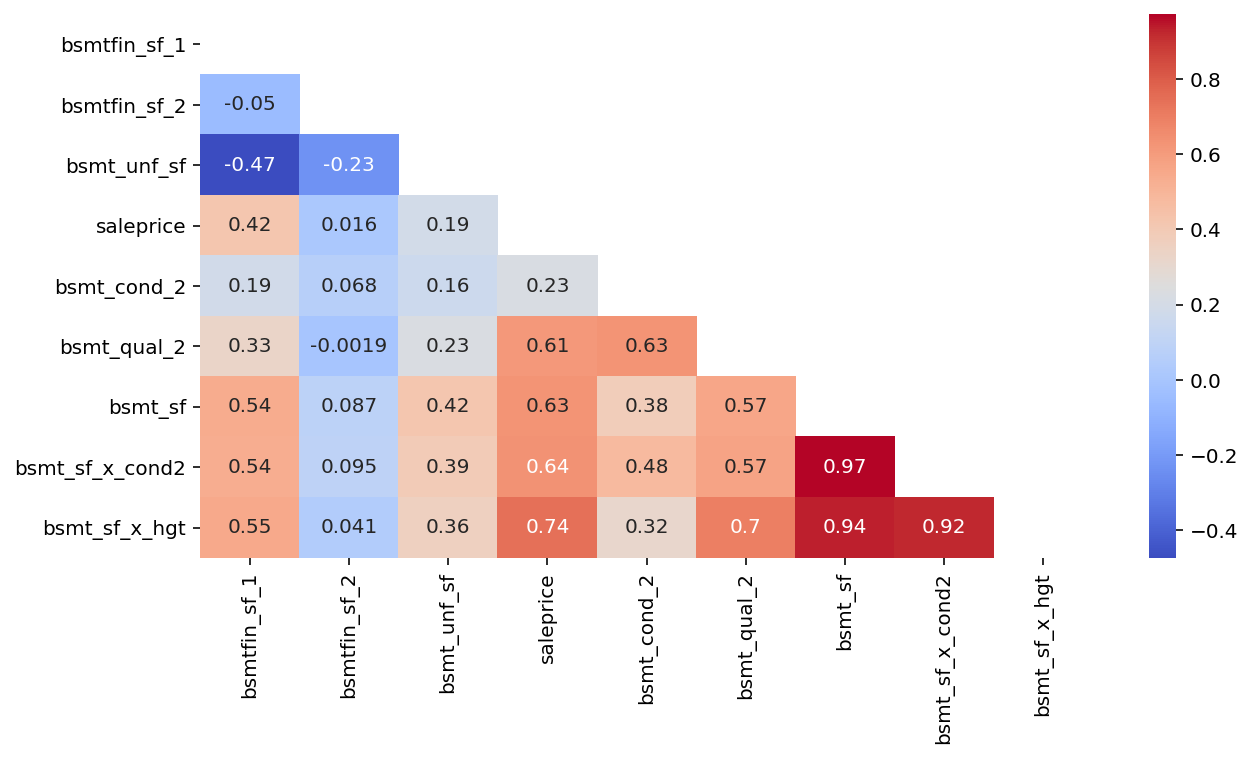

In [62]:
# Let's heatmap it:
mask = np.zeros_like(ames_bsmts.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,5))
sns.heatmap(
    ames_bsmts.corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask
);

In [63]:
# Adding high correlation basement features to the main dataset:

ames['bsmt_qual_2'] = ames.apply(lambda data: bsmt_hgt(data), axis=1)
ames['bsmt_sf'] = ames['bsmtfin_sf_1'] + ames['bsmtfin_sf_2'] + ames['bsmt_unf_sf']
ames['bsmt_cond_2'] = ames.apply(lambda data: bsmt_int(data), axis=1)
ames['bsmt_sf_x_cond2'] = ames['bsmt_cond_2'] * ames['bsmt_sf']
ames['bsmt_sf_x_hgt'] = ames['bsmt_qual_2'] * ames['bsmt_sf']

In [64]:
ames.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,house_type_1Fam,house_type_Twnhs,date_blt_1945-1979,date_blt_1980-2010,home_age,bsmt_qual_2,bsmt_sf,bsmt_cond_2,bsmt_sf_x_cond2,bsmt_sf_x_hgt
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,1,0,1,0,34,3,725.0,3,2175.0,2175.0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,1,0,0,1,14,4,913.0,3,2739.0,3652.0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,1,0,1,0,57,3,1057.0,3,3171.0,3171.0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,1,0,0,1,4,4,384.0,3,1152.0,1536.0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,1,0,0,0,110,2,676.0,4,2704.0,1352.0


#### Exterior Condition & Quality

In [65]:
# Changing Exterior quality and condition into numeric features for modeling:

def ext_int(data):
    if data['exter_qual'] == 'Ex':
        return 5
    elif data['exter_qual'] == 'Gd':
        return 4
    elif data['exter_qual'] == 'TA':
        return 3
    elif data['exter_qual'] == 'Fa':
        return 2
    elif data['exter_qual'] == 'Po':
        return 1
    else:
        return 0

In [66]:
ames['exter_qual2'] = ames.apply(lambda data: ext_int(data), axis=1)

In [67]:
def ext_int(data):
    if data['exter_cond'] == 'Ex':
        return 5
    elif data['exter_cond'] == 'Gd':
        return 4
    elif data['exter_cond'] == 'TA':
        return 3
    elif data['exter_cond'] == 'Fa':
        return 2
    elif data['exter_cond'] == 'Po':
        return 1
    else:
        return 0

In [68]:
ames['exter_cond2'] = ames.apply(lambda data: ext_int(data), axis=1)

In [69]:
ames.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,date_blt_1945-1979,date_blt_1980-2010,home_age,bsmt_qual_2,bsmt_sf,bsmt_cond_2,bsmt_sf_x_cond2,bsmt_sf_x_hgt,exter_qual2,exter_cond2
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,1,0,34,3,725.0,3,2175.0,2175.0,4,3
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,1,14,4,913.0,3,2739.0,3652.0,4,3
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,1,0,57,3,1057.0,3,3171.0,3171.0,3,4
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,1,4,4,384.0,3,1152.0,1536.0,3,3
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,110,2,676.0,4,2704.0,1352.0,3,3


#### Neighborhoods

In [70]:
# Deep dive into neighborhoods to see if any have strong correlation to price.
# First separating out data for ease of analysis:
ames_hoods = ames[['neighborhood', 'saleprice']]

In [71]:
ames_hoods.groupby(['neighborhood']).describe()

saleprice                                                     \
                 count           mean            std       min        25%   
neighborhood                                                                
Blmngtn           22.0  200417.681818   27447.004922  159895.0  180250.00   
Blueste            6.0  144566.666667   26089.589239  121000.0  123925.00   
BrDale            19.0  103371.052632   11262.318142   85400.0   93750.00   
BrkSide           76.0  127022.697368   34825.975741   39300.0  109375.00   
ClearCr           27.0  217490.074074   53479.942309  130000.0  177500.00   
CollgCr          180.0  202497.216667   54022.918602  110000.0  164740.00   
Crawfor           71.0  205901.211268   60856.738509   90350.0  158250.00   
Edwards          143.0  130493.468531   51123.818503   35000.0  101000.00   
Gilbert          116.0  189228.387931   32434.069509  133000.0  172281.25   
Greens             3.0  188666.666667   18036.999011  170000.0  180000.00   
GrnHill            2.0  280000.000000   70710.678119  230000.0  255000.00   
IDOTRR            69.0  101103.188406   37891.222668   13100.0   72000.00   
Landmrk            1.0  137000.000000            NaN  137000.0  137000.00   
MeadowV           24.0  100231.250000   21955.012365   73000.0   84875.00   
Mitchel           82.0  167656.707317   41581.768146   81500.0  136375.00   
NAmes            310.0  145905.816129   31748.016563   68000.0  128000.00   
NPkVill           17.0  140476.470588   10285.762576  120000.0  137500.00   
NWAmes            87.0  194619.022989   39628.081135  113000.0  171000.00   
NoRidge           48.0  316294.125000   67015.947652  190000.0  279875.00   
NridgHt          122.0  322831.352459   92964.835768  154000.0  259279.00   
OldTown          163.0  125276.300613   47882.265595   12789.0  104750.00   
SWISU             32.0  134758.875000   33074.560117   60000.0  111125.00   
Sawyer           111.0  137181.909910   24163.036900   62383.0  124550.00   
SawyerW           87.0  187760.160920   50508.254983   82000.0  148491.50   
Somerst          130.0  227183.900000   55518.617822  144152.0  180500.00   
StoneBr           38.0  329675.736842  128597.738212  130000.0  218125.00   
Timber            48.0  241051.354167   70247.203305  137500.0  180375.00   
Veenker           17.0  253570.588235   69147.647869  150000.0  192000.00   

                                             
                   50%        75%       max  
neighborhood                                 
Blmngtn       192250.0  218742.50  264561.0  
Blueste       137500.0  159625.00  185000.0  
BrDale        105500.0  111875.00  122500.0  
BrkSide       128000.0  139975.00  223500.0  
ClearCr       225000.0  250500.00  328000.0  
CollgCr       200000.0  225250.00  475000.0  
Crawfor       199500.0  235250.00  392500.0  
Edwards       125000.0  142500.00  415000.0  
Gilbert       180750.0  193625.00  377500.0  
Greens        190000.0  198000.00  206000.0  
GrnHill       280000.0  305000.00  330000.0  
IDOTRR        102000.0  126000.00  202500.0  
Landmrk       137000.0  137000.00  137000.0  
MeadowV        92450.0  117250.00  151400.0  
Mitchel       160000.0  188000.00  300000.0  
NAmes         141000.0  159000.00  345000.0  
NPkVill       143000.0  148500.00  155000.0  
NWAmes        185000.0  214125.00  306000.0  
NoRidge       300750.0  337750.00  584500.0  
NridgHt       317500.0  379040.50  611657.0  
OldTown       120000.0  140375.00  475000.0  
SWISU         136200.0  157608.50  200000.0  
Sawyer        135000.0  149950.00  219000.0  
SawyerW       181000.0  222121.50  320000.0  
Somerst       224000.0  257375.00  468000.0  
StoneBr       322450.0  427085.00  591587.0  
Timber        220000.0  281409.75  425000.0  
Veenker       260000.0  290000.00  385000.0

In [72]:
# Dummifying all neighborhoods. 
# I'm not dropping first because I'm going to remove some neighborhoods after dummifying.
# Observations where False for all neighborhood params can be assumed to be included in "all other neighbors"
ames_hoods = pd.get_dummies(data=ames_hoods, columns=['neighborhood'])

In [73]:
ames_hoods.head()

,saleprice,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,130500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,220000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,109000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,174000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,138500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [74]:
# Dropping columns for neighborhoods with less than 35 houses in the dataset, taking place of "drop first":
# Homes with all 0's in the neighborhood variables remaining in the dataset can be assumed to be in a small/underrepresented neighborhood. 
ames_hoods.drop(columns=['neighborhood_Landmrk', 
                   'neighborhood_GrnHill', 
                   'neighborhood_Greens',
                   'neighborhood_Blueste',
                   'neighborhood_Veenker',
                   'neighborhood_SWISU',
                   'neighborhood_NPkVill',
                   'neighborhood_MeadowV',
                   'neighborhood_ClearCr',
                   'neighborhood_BrDale',
                   'neighborhood_Blmngtn'
                        ], 
          inplace=True)

In [75]:
# Looking for any neighborhoods with a strong correlation to price:
ames_hoods.corr()

,saleprice,neighborhood_BrkSide,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber
saleprice,1.000000,-0.134790,0.082309,0.058386,-0.176119,0.023974,-0.189237,-0.035574,-0.189387,0.034926,0.263395,0.448647,-0.208371,-0.133692,0.016708,0.150078,0.256977,0.116400
neighborhood_BrkSide,-0.134790,1.000000,-0.060845,-0.037147,-0.053703,-0.048030,-0.036601,-0.040032,-0.082776,-0.041287,-0.030367,-0.049333,-0.057639,-0.046923,-0.041287,-0.051031,-0.026952,-0.030367
neighborhood_CollgCr,0.082309,-0.060845,1.000000,-0.058735,-0.084914,-0.075943,-0.057872,-0.063297,-0.130882,-0.065281,-0.048015,-0.078003,-0.091136,-0.074192,-0.065281,-0.080688,-0.042616,-0.048015
neighborhood_Crawfor,0.058386,-0.037147,-0.058735,1.000000,-0.051841,-0.046364,-0.035332,-0.038644,-0.079906,-0.039855,-0.029314,-0.047622,-0.055640,-0.045296,-0.039855,-0.049261,-0.026018,-0.029314
neighborhood_Edwards,-0.176119,-0.053703,-0.084914,-0.051841,1.000000,-0.067030,-0.051080,-0.055868,-0.115521,-0.057619,-0.042380,-0.068848,-0.080440,-0.065485,-0.057619,-0.071218,-0.037614,-0.042380
neighborhood_Gilbert,0.023974,-0.048030,-0.075943,-0.046364,-0.067030,1.000000,-0.045684,-0.049966,-0.103317,-0.051532,-0.037903,-0.061575,-0.071942,-0.058566,-0.051532,-0.063694,-0.033640,-0.037903
neighborhood_IDOTRR,-0.189237,-0.036601,-0.057872,-0.035332,-0.051080,-0.045684,1.000000,-0.038076,-0.078733,-0.039270,-0.028884,-0.046923,-0.054823,-0.044631,-0.039270,-0.048538,-0.025636,-0.028884
neighborhood_Mitchel,-0.035574,-0.040032,-0.063297,-0.038644,-0.055868,-0.049966,-0.038076,1.000000,-0.086112,-0.042951,-0.031591,-0.051321,-0.059962,-0.048814,-0.042951,-0.053087,-0.028038,-0.031591
neighborhood_NAmes,-0.189387,-0.082776,-0.130882,-0.079906,-0.115521,-0.103317,-0.078733,-0.086112,1.000000,-0.088812,-0.065322,-0.106120,-0.123986,-0.100935,-0.088812,-0.109771,-0.057976,-0.065322
neighborhood_NWAmes,0.034926,-0.041287,-0.065281,-0.039855,-0.057619,-0.051532,-0.039270,-0.042951,-0.088812,1.000000,-0.032581,-0.052930,-0.061842,-0.050344,-0.044297,-0.054752,-0.028917,-0.032581


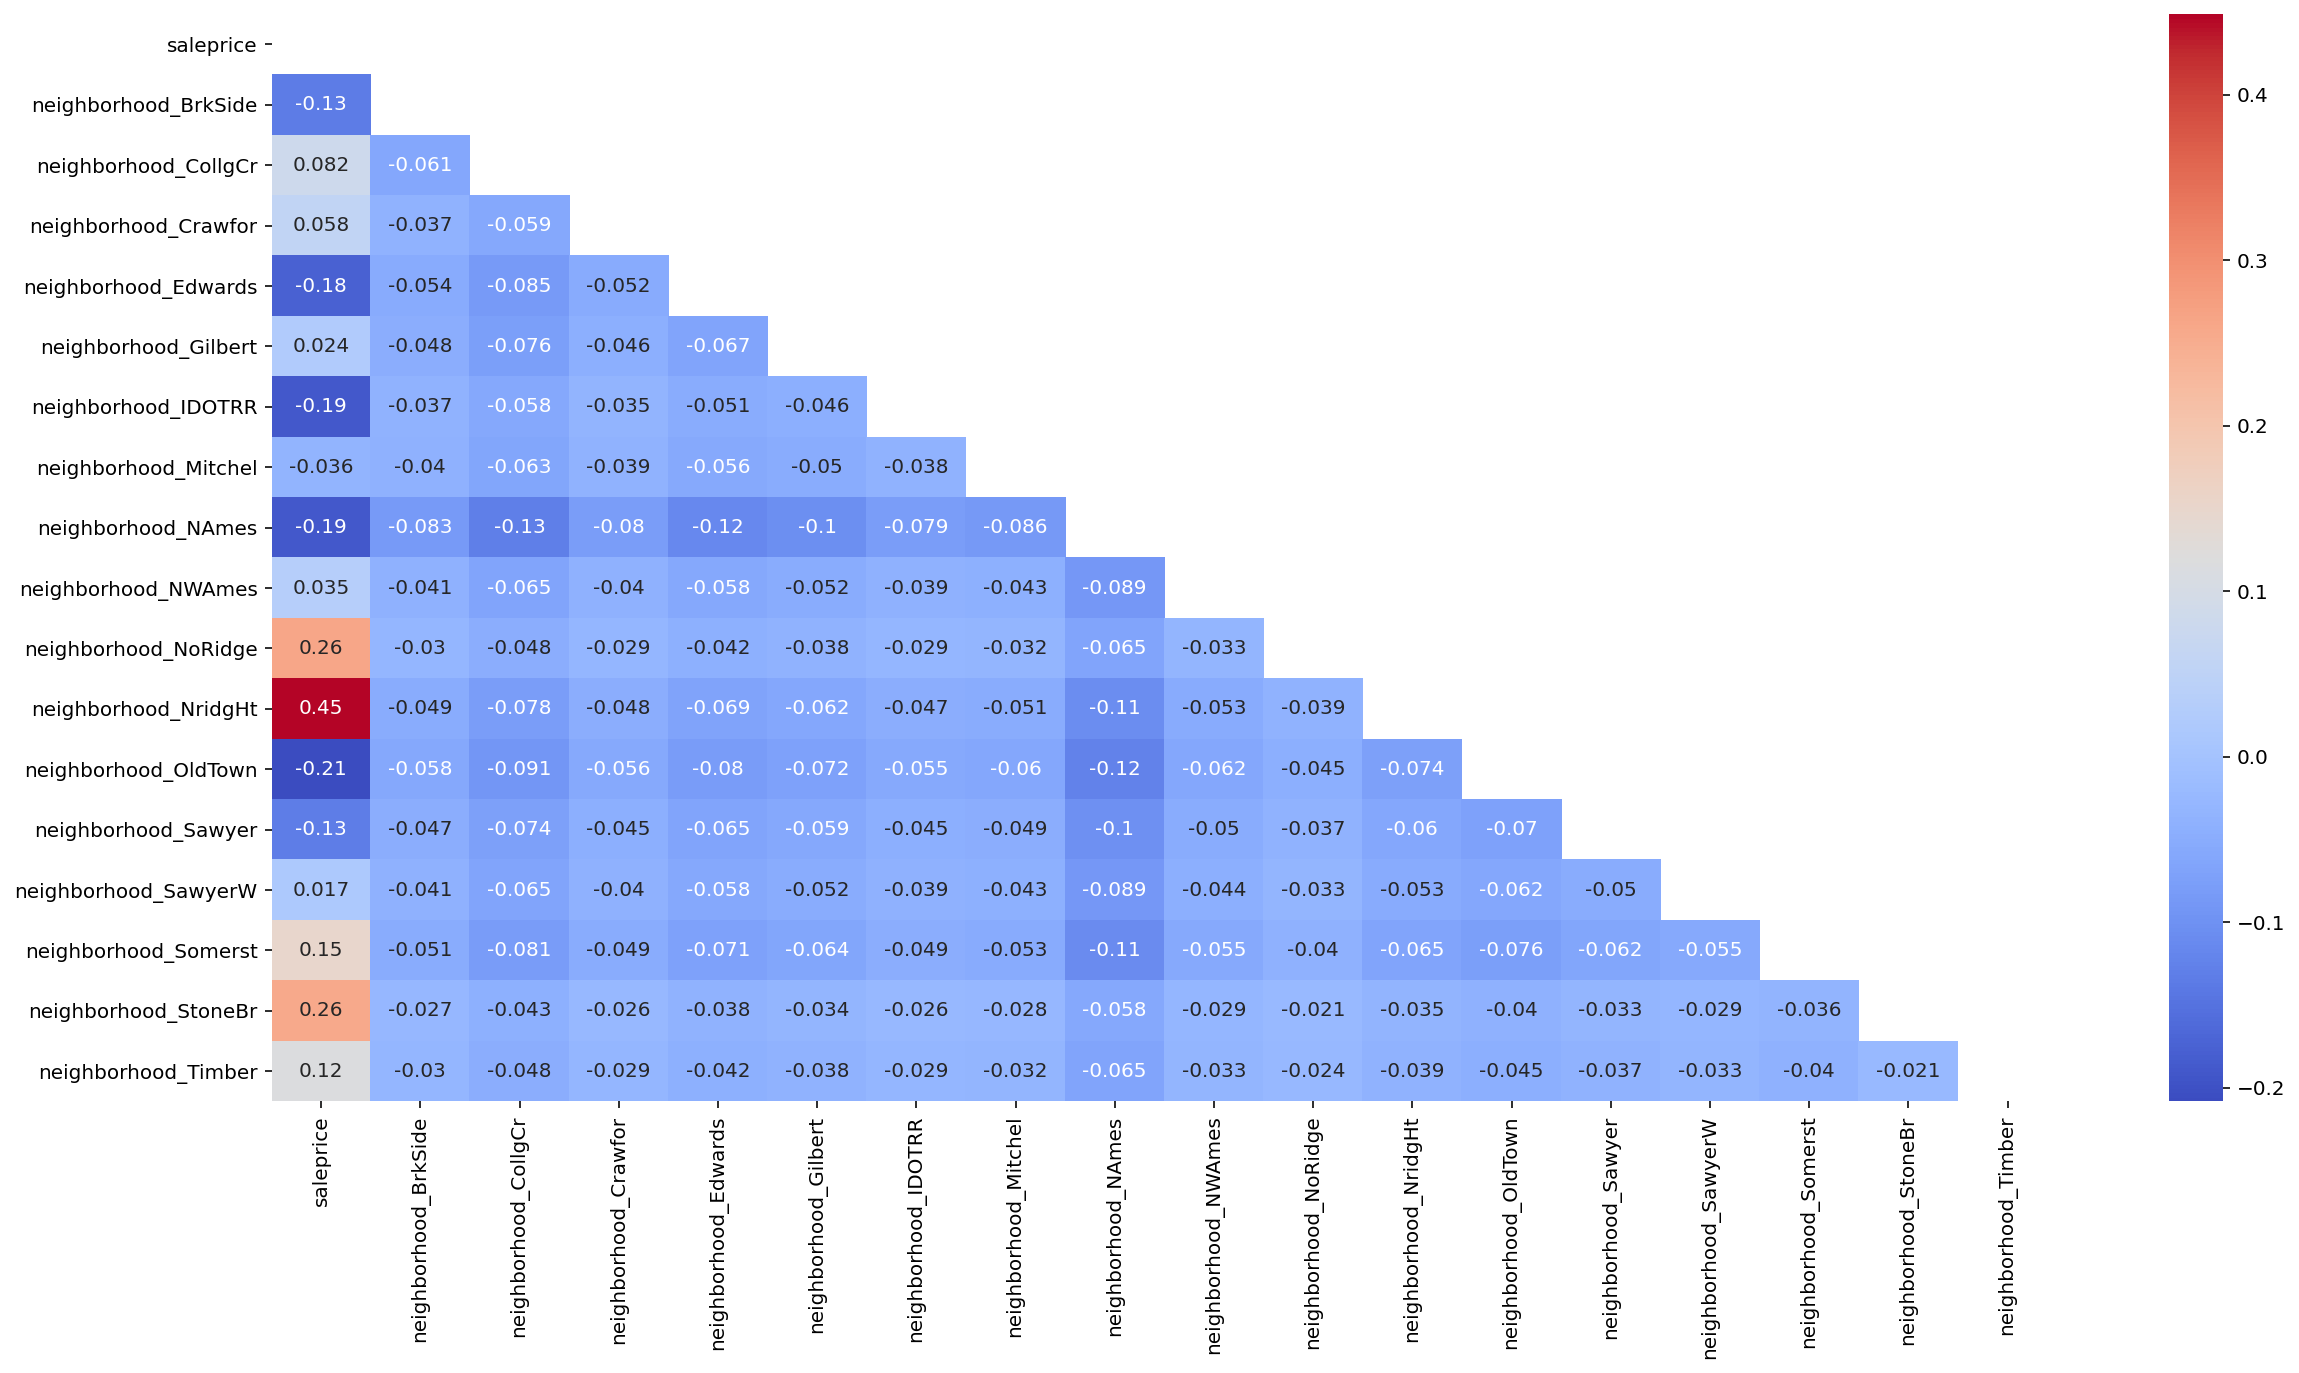

In [76]:
# Let's heatmap it:
mask = np.zeros_like(ames_hoods.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,10))
sns.heatmap(
    ames_hoods.corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask
);

In [77]:
# Dummifying all neighborhoods in main dataset: ames 
# I'm not dropping first because I'm going to remove some neighborhoods after dummifying.
# Observations where False for all neighborhood params can be assumed to be included in "all other neighbors"
ames = pd.get_dummies(data=ames, columns=['neighborhood'])

In [78]:
ames.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,1,0,0,0,0


In [79]:
# Dropping columns for all neighborhoods with low number of observations and/or low correlation to price:
# This is in lieu of dropping first. 
ames.drop(columns=['neighborhood_Landmrk', 
                   'neighborhood_GrnHill', 
                   'neighborhood_Greens',
                   'neighborhood_Blueste',
                   'neighborhood_Veenker',
                   'neighborhood_SWISU',
                   'neighborhood_NPkVill',
                   'neighborhood_MeadowV',
                   'neighborhood_ClearCr',
                   'neighborhood_BrDale',
                   'neighborhood_Blmngtn'
                        ], inplace=True)

In [80]:
ames.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,neighborhood_NAmes,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,1,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,1,0,0,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,1,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,1,0,0,0


#### Binarize Various Columns

The following features are ones that I feel are not worth dummifying. Instead, a single column that simply indicates a particular level of quality, or the presence of a feature (is there a fence or not) seems like it would be a tighter predictor than retaining all the various values via dummifying. Also, some variables have a small number of observations for one or more values, so this means we can retain that info in rolled up form. Also, this clears out null values for many fields, by assuming a null is a negative for that feature. 

In [81]:
ames['bsmt_cond'].value_counts(dropna=False)

TA     1834
Gd       89
Fa       65
NaN      55
Po        5
Ex        3
Name: bsmt_cond, dtype: int64

In [82]:
ames['bsmt_ok_yn'] = ames.bsmt_cond.map(lambda b: True if b in ('TA', 'Gd', 'Ex') else False)

In [83]:
ames['fireplace_yn'] = ames.fireplaces.map(lambda fp: False if fp == 0 else True)

In [84]:
ames['pool_yn'] = ames.pool_area.map(lambda p: False if p == 0 else True)

In [85]:
ames['fence_yn'] = ames.fence.map(lambda f: True if f in ('MnPrv', 'GdPrv', 'GdWo', 'MnWw') else False)

In [86]:
ames['railroad_yn'] = ames.condition_1.map(lambda rr: True if rr in ('RRAn', 'RRAe', 'RRNn', 'RRNe') else False)

In [87]:
ames['central_air'] = ames.central_air.map(lambda air: True if air == 'Y' else False)

In [88]:
ames['lotshape_reg_yn'] = ames.lot_shape.map(lambda lot: True if lot == 'Reg' else False)

In [89]:
ames['bsmt_usable_yn'] = ames.bsmtfin_type_1.map(lambda q: True if q in ('GLQ', 'ALQ', 'Rec') else False)

In [90]:
ames['remodeled'] = ames['year_remod/add'] - ames['year_built']
ames['remodel_yn'] = ames.remodeled.map(lambda x: True if x > 0 else False)

In [91]:
# Verifying remodel_yn populated correctly.
ames[['year_built', 'year_remod/add', 'remodel_yn', 'remodeled']]

,year_built,year_remod/add,remodel_yn,remodeled
0,1976,2005,True,29
1,1996,1997,True,1
2,1953,2007,True,54
3,2006,2007,True,1
4,1900,1993,True,93
...,...,...,...,...
2046,2007,2007,False,0
2047,1940,1950,True,10
2048,1928,1950,True,22
2049,1956,1956,False,0


#### Correct Null Values

In [92]:
# Replace null garage values with None:
ames['garage_type'] = ames.garage_type.apply(lambda g: 'None' if g is np.nan else g)

In [93]:
# Verifying null replacement worked:
ames['garage_type'].value_counts(dropna=False)

Attchd     1213
Detchd      536
BuiltIn     132
None        113
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [94]:
# Replacing null lot_frontage with 0'snusing technique Sophie showed me, because null != null:
ames['lot_frontage'] = ames.lot_frontage.apply(lambda x: 0 if x != x else x)

In [95]:
ames.isnull().sum().head(10)

id                 0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley           1911
lot_shape          0
land_contour       0
dtype: int64

#### Remove Observations with Null Values

In [96]:
# Remove records with null sq footage, bath counts, garage_cars, as there are very few and it's unlikely null means 0 in these cases:
ames.dropna(subset=['total_house_sf', 'baths', 'garage_cars'], inplace=True)

In [97]:
# Verifying 3 dropped records due to removing nulls from above columns:
ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2050
Columns: 126 entries, id to remodel_yn
dtypes: bool(9), float64(16), int64(35), object(39), uint8(27)
memory usage: 1.5+ MB


#### Removing Outliers

In [98]:
ames['total_house_sf'].sort_values(ascending=False)

960     11752.0
1885    10190.0
328      6428.0
1227     5542.0
1897     5508.0
         ...   
432       728.0
114       660.0
696       640.0
1089      612.0
1428      334.0
Name: total_house_sf, Length: 2048, dtype: float64

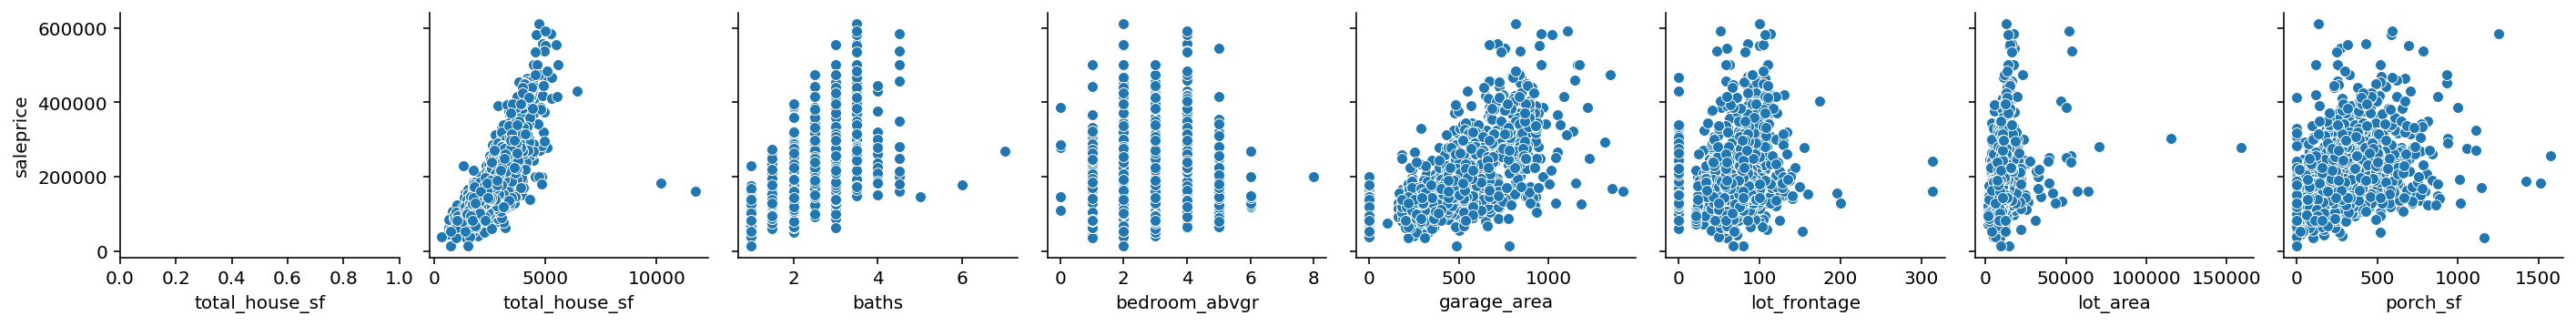

In [99]:
# Use PairPlot to look for outliers:

sns.pairplot(ames, x_vars=['total_house_sf',
                           'total_house_sf',
                           'baths', 
                           'bedroom_abvgr',
                           'garage_area',
                           'lot_frontage',
                           'lot_area',
                           'porch_sf',
                               ], 
             y_vars=['saleprice']);

In [100]:
# Figuring out cut off points for outliers for each variable:

ames['total_house_sf'].sort_values(ascending=False).head()
ames['bsmt_sf'].sort_values(ascending=False).head()
ames['lot_frontage'].sort_values(ascending=False).head(10)
ames['lot_area'].sort_values(ascending=False).head(10)
ames['porch_sf'].sort_values(ascending=False).head(10)
ames['baths'].value_counts(dropna=False)

2.0    635
2.5    391
1.0    314
3.0    278
3.5    199
1.5    193
4.0     22
4.5     11
7.0      2
6.0      2
5.0      1
Name: baths, dtype: int64

In [101]:
# Dropping outliers from continuous variables within the data:
ames = ames[ames['total_house_sf'] < 7000] # removes 2 records
ames = ames[ames['lot_frontage'] < 300] # removes 2 record
ames = ames[ames['lot_area'] < 100000] # removes 2 records
ames = ames[ames['porch_sf'] < 1400] # removes 2 records
ames = ames[ames['baths'] <= 4] # removes 6 records


ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2050
Columns: 126 entries, id to remodel_yn
dtypes: bool(9), float64(16), int64(35), object(39), uint8(27)
memory usage: 1.5+ MB


In [102]:
# Create some polynomial features:

ames['house_sf_x_overall_qual'] = ames['total_house_sf'] * ames['overall_qual']
ames['overall_qual_x_overall_cond'] = ames['overall_cond'] * ames['overall_qual']


ames.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,fireplace_yn,pool_yn,fence_yn,railroad_yn,lotshape_reg_yn,bsmt_usable_yn,remodeled,remodel_yn,house_sf_x_overall_qual,overall_qual_x_overall_cond
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,False,False,False,True,False,True,29,True,13224.0,48
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,True,False,False,False,False,True,1,True,21245.0,35
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,False,False,False,False,True,True,54,True,10570.0,35
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,False,False,False,False,True,False,1,True,9140.0,25
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,False,False,False,False,False,False,93,True,12726.0,48


### Look at Correlations

In [103]:
# Create and EDA final dataset - doing this simply so the data is more manageable
# ames_lite is a first pass as reducing my features to those most likely to be predictive in my model:
ames_lite = ames[['lot_area', 
                  'lot_frontage',
                 'overall_qual', 
                 'overall_cond', 
                 'exter_qual2',
                 'exter_cond2', 
                 'year_built', 
                 'year_remod/add',
                 'home_age', 
                 'total_house_sf', 
                 'porch_sf',
                 'gr_liv_area',
                 'bsmt_sf',
                 'totrms_abvgrd',
                 'bedroom_abvgr',
                 'baths', 
                 'date_blt_1945-1979', 
                 'date_blt_1980-2010', 
                 'lot_config_Corner', 
                 'lot_config_CulDSac', 
                 'lot_config_Inside', 
                 'lotshape_reg_yn', 
                 'zone_FV', 
                 'zone_RL', 
                 'zone_RM', 
                 'house_type_1Fam', 
                 'house_type_Twnhs', 
                 'neighborhood_Edwards', 
                 'neighborhood_IDOTRR', 
                 'neighborhood_NAmes', 
                 'neighborhood_NoRidge', 
                 'neighborhood_NridgHt', 
                 'neighborhood_OldTown', 
                 'neighborhood_StoneBr',
                 'remodel_yn',
                 'fireplaces',
                 'fireplace_yn', 
                 'pool_yn', 
                 'fence_yn', 
                 'railroad_yn', 
                 'garage_cars',
                 'bsmt_ok_yn',
                 'bsmt_usable_yn',
                 'bsmt_cond_2',
                 'bsmt_qual_2',
                 'house_sf_x_overall_qual',
                 'overall_qual_x_overall_cond',
                 'bsmt_sf_x_cond2',
                 'bsmt_sf_x_hgt',
                 'saleprice'
                ]]

In [104]:
ames_lite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2050
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   lot_area                     2026 non-null   int64  
 1   lot_frontage                 2026 non-null   float64
 2   overall_qual                 2026 non-null   int64  
 3   overall_cond                 2026 non-null   int64  
 4   exter_qual2                  2026 non-null   int64  
 5   exter_cond2                  2026 non-null   int64  
 6   year_built                   2026 non-null   int64  
 7   year_remod/add               2026 non-null   int64  
 8   home_age                     2026 non-null   int64  
 9   total_house_sf               2026 non-null   float64
 10  porch_sf                     2026 non-null   int64  
 11  gr_liv_area                  2026 non-null   int64  
 12  bsmt_sf                      2026 non-null   float64
 13  totrms_abvgrd     

In [105]:
ames_lite.isnull().sum()

lot_area                       0
lot_frontage                   0
overall_qual                   0
overall_cond                   0
exter_qual2                    0
exter_cond2                    0
year_built                     0
year_remod/add                 0
home_age                       0
total_house_sf                 0
porch_sf                       0
gr_liv_area                    0
bsmt_sf                        0
totrms_abvgrd                  0
bedroom_abvgr                  0
baths                          0
date_blt_1945-1979             0
date_blt_1980-2010             0
lot_config_Corner              0
lot_config_CulDSac             0
lot_config_Inside              0
lotshape_reg_yn                0
zone_FV                        0
zone_RL                        0
zone_RM                        0
house_type_1Fam                0
house_type_Twnhs               0
neighborhood_Edwards           0
neighborhood_IDOTRR            0
neighborhood_NAmes             0
neighborho

In [106]:
ames_lite.shape

(2026, 50)

In [107]:
ames_lite.corr()

,lot_area,lot_frontage,overall_qual,overall_cond,exter_qual2,exter_cond2,year_built,year_remod/add,home_age,total_house_sf,...,garage_cars,bsmt_ok_yn,bsmt_usable_yn,bsmt_cond_2,bsmt_qual_2,house_sf_x_overall_qual,overall_qual_x_overall_cond,bsmt_sf_x_cond2,bsmt_sf_x_hgt,saleprice
lot_area,1.000000,0.163042,0.106365,-0.037099,0.081054,0.035270,0.041534,0.025860,-0.041534,0.356001,...,0.262954,0.005048,0.021334,-0.003938,0.059418,0.279912,0.071649,0.272834,0.254130,0.336951
lot_frontage,0.163042,1.000000,0.105625,-0.037112,0.095385,-0.039875,0.019647,0.055236,-0.019647,0.185434,...,0.122882,-0.016120,-0.032017,0.005411,0.043293,0.184201,0.053319,0.176036,0.177953,0.190408
overall_qual,0.106365,0.105625,1.000000,-0.078234,0.739186,0.014257,0.601736,0.584417,-0.601736,0.669576,...,0.588732,0.282123,0.219416,0.302138,0.652539,0.871842,0.734059,0.567571,0.681622,0.806537
overall_cond,-0.037099,-0.037112,-0.078234,1.000000,-0.155754,0.419708,-0.367904,0.045006,0.367904,-0.160097,...,-0.166134,0.116045,-0.002775,0.127621,-0.162869,-0.151816,0.598399,-0.126837,-0.220056,-0.094747
exter_qual2,0.081054,0.095385,0.739186,-0.155754,1.000000,0.030701,0.618763,0.620490,-0.618763,0.538519,...,0.527442,0.210925,0.196077,0.194876,0.580627,0.700487,0.467877,0.488737,0.628887,0.719895
exter_cond2,0.035270,-0.039875,0.014257,0.419708,0.030701,1.000000,-0.090482,0.103632,0.090482,0.003159,...,0.002452,0.103017,0.045631,0.145807,-0.012610,-0.002256,0.284285,0.024925,-0.040553,0.023339
year_built,0.041534,0.019647,0.601736,-0.367904,0.618763,-0.090482,1.000000,0.631123,-1.000000,0.404122,...,0.545718,0.256677,0.308022,0.194088,0.624889,0.522693,0.197449,0.446410,0.578045,0.577933
year_remod/add,0.025860,0.055236,0.584417,0.045006,0.620490,0.103632,0.631123,1.000000,-0.631123,0.381072,...,0.445507,0.193441,0.193292,0.197971,0.542153,0.499187,0.471504,0.332487,0.460919,0.554644
home_age,-0.041534,-0.019647,-0.601736,0.367904,-0.618763,0.090482,-1.000000,-0.631123,1.000000,-0.404122,...,-0.545718,-0.256677,-0.308022,-0.194088,-0.624889,-0.522693,-0.197449,-0.446410,-0.578045,-0.577933
total_house_sf,0.356001,0.185434,0.669576,-0.160097,0.538519,0.003159,0.404122,0.381072,-0.404122,1.000000,...,0.559856,0.231388,0.178595,0.280440,0.542074,0.924769,0.424605,0.800424,0.814969,0.825443


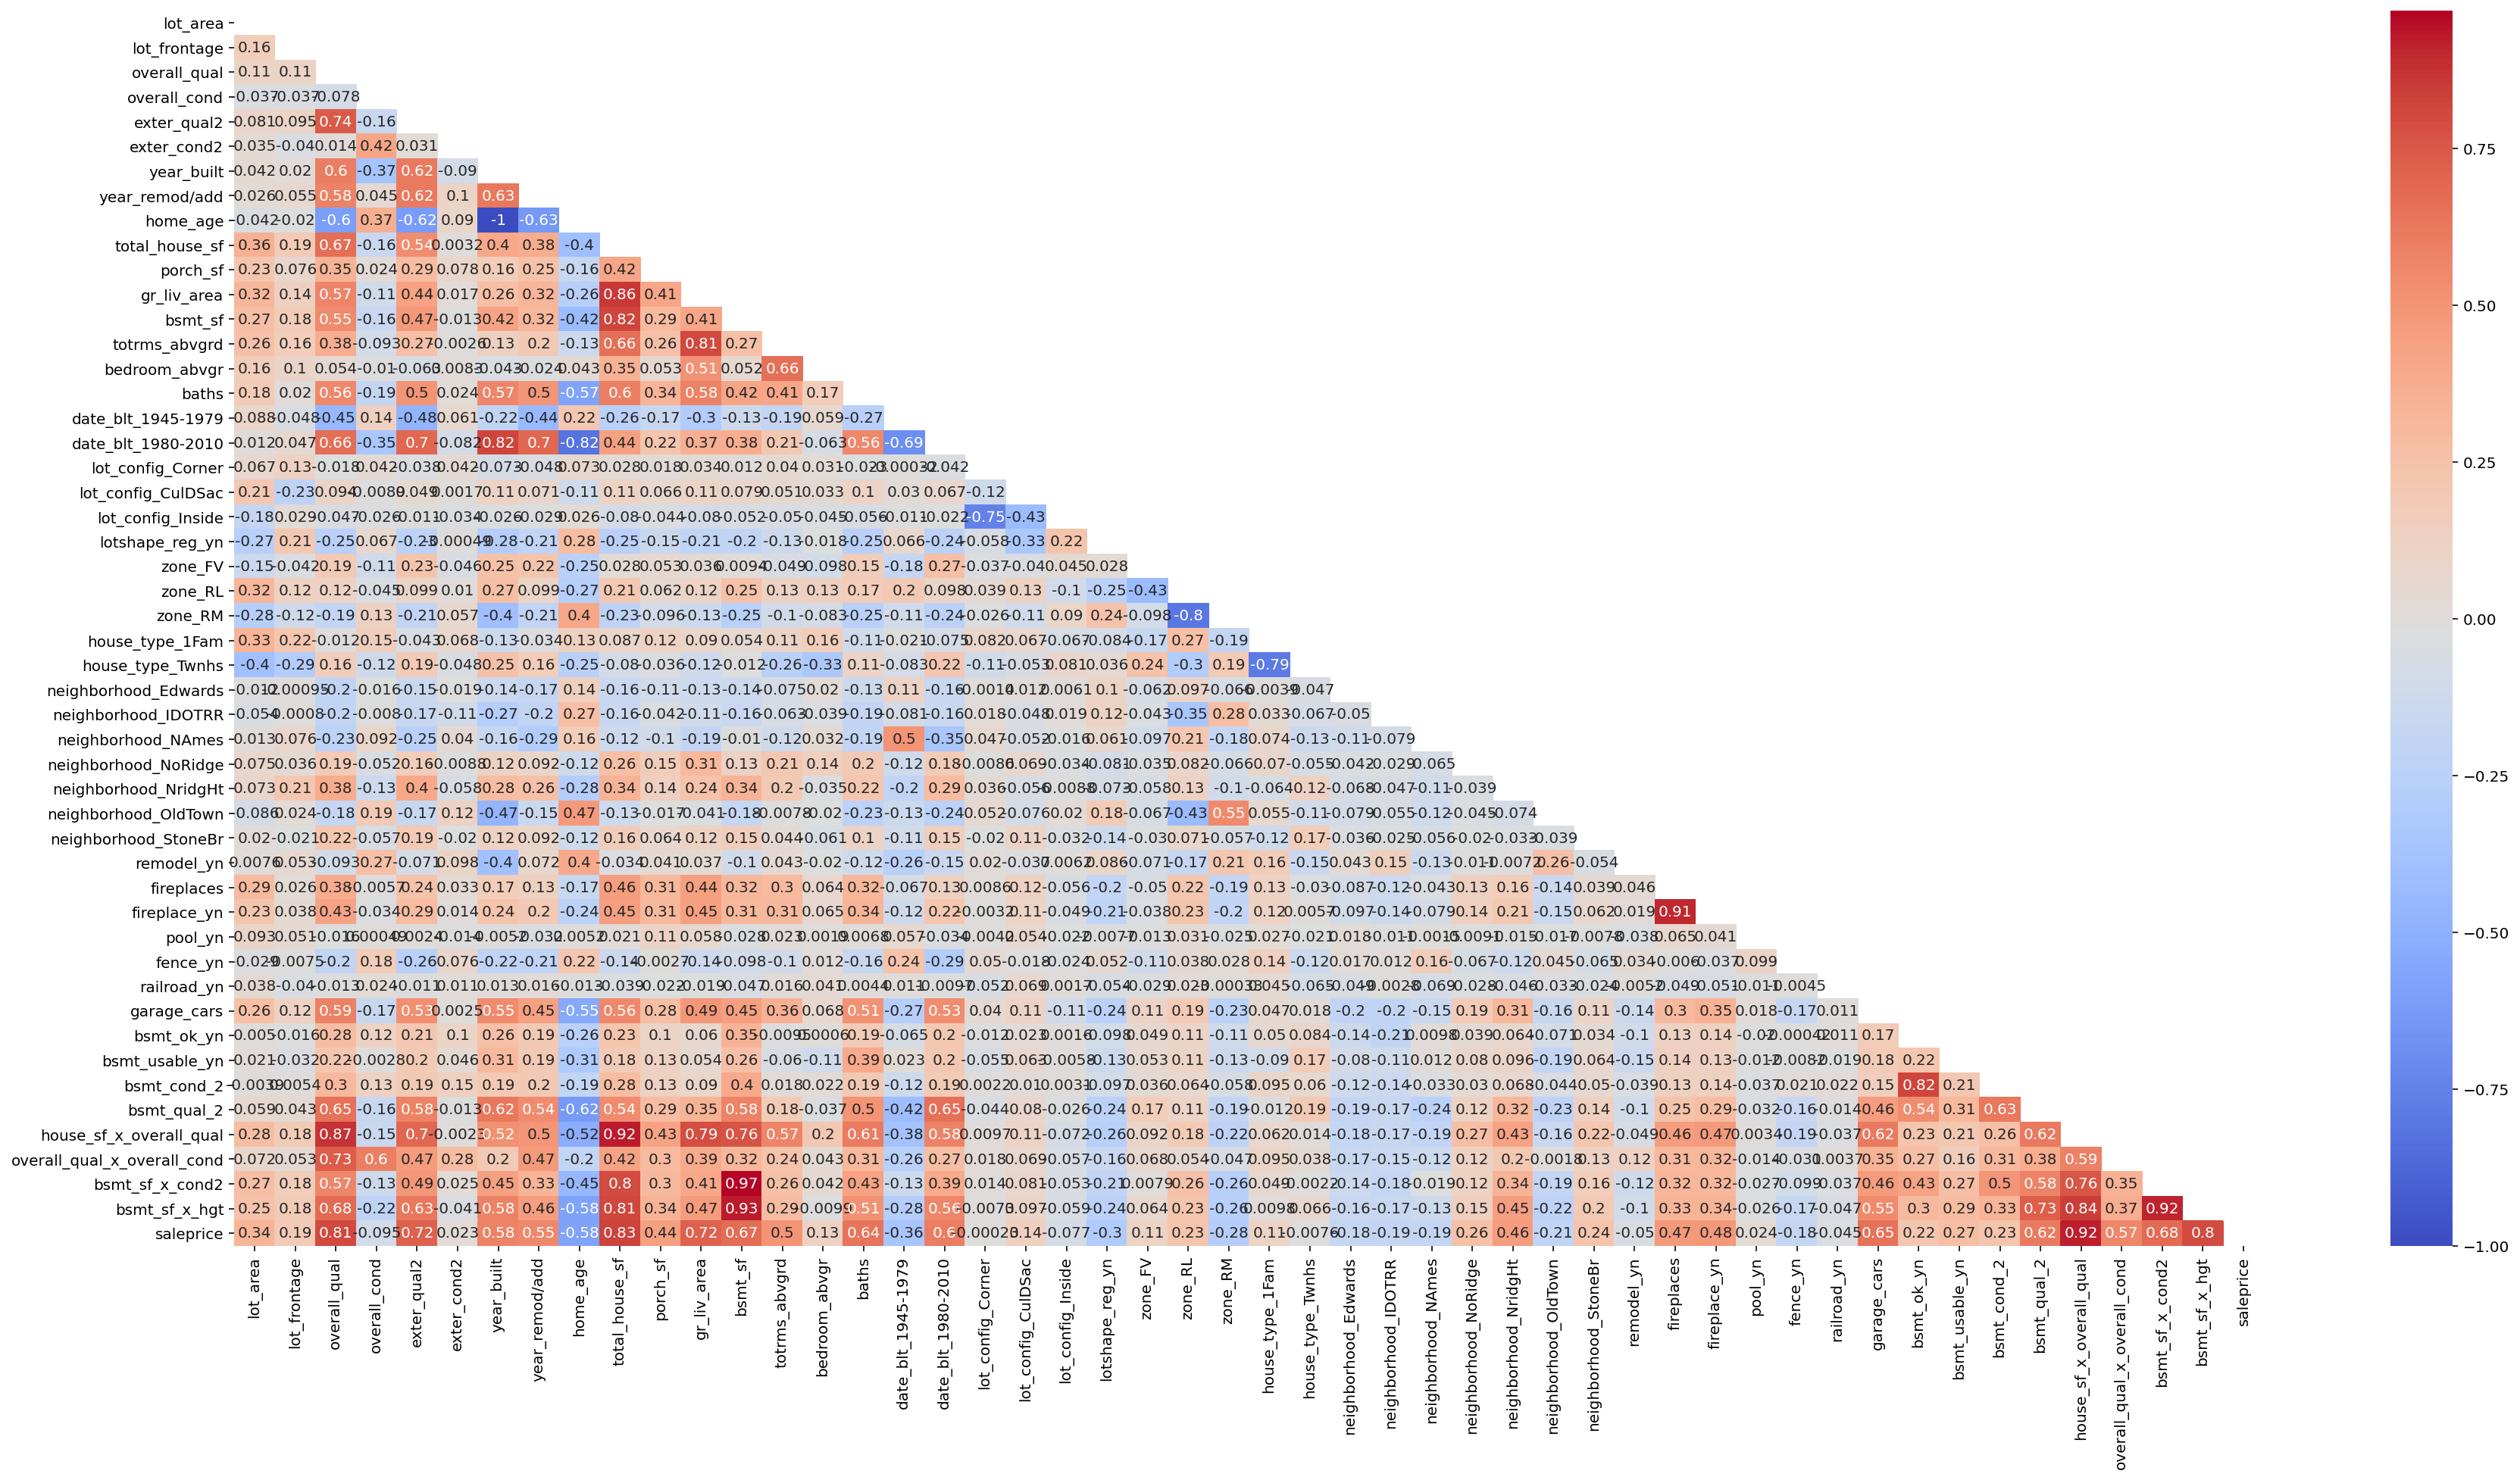

In [108]:
mask = np.zeros_like(ames_lite.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(30,15))
sns.heatmap(
    ames_lite.corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask
);

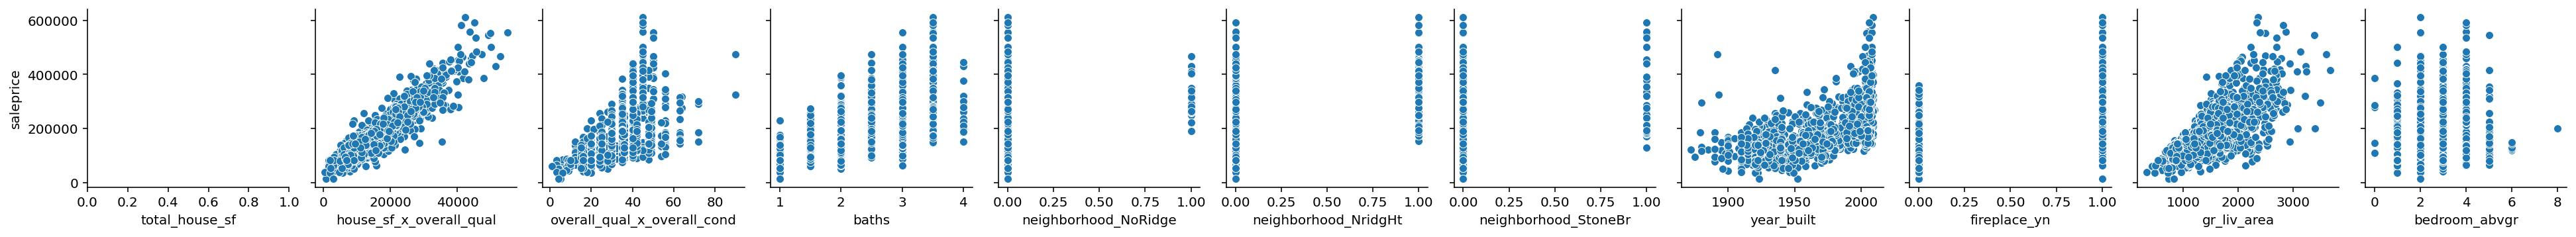

In [109]:
sns.pairplot(ames_lite, x_vars=['total_house_sf',
                                'house_sf_x_overall_qual',
                                'overall_qual_x_overall_cond',
                                'baths', 
                                'neighborhood_NoRidge', 
                                'neighborhood_NridgHt',
                                'neighborhood_StoneBr',
                                'year_built', 
                                'fireplace_yn',
                                'gr_liv_area',
                                'bedroom_abvgr'
                               ], 
             y_vars=['saleprice'])


In [110]:
# sns.lmplot(x='total_house_sf', y='saleprice', data=ames_lite)
# sns.lmplot(x='year_remod/add', y='saleprice', data=ames_lite)
# sns.lmplot(x='house_sf_x_overall_qual', y='saleprice', data=ames_lite)
# sns.lmplot(x='bsmt_sf_x_cond2', y='saleprice', data=ames_lite)
# sns.lmplot(x='overall_qual', y='saleprice', data=ames_lite)
# plt.show()

### Export Final Project Dataset

In [ ]:
ames_lite.to_csv('./datasets/ames_train_transform.csv')

### Build Models

In [111]:
ames_lr = LinearRegression() # For Kaggle 
ames_lr_pres = LinearRegression() # For presentation
ames_ss = StandardScaler()
ames_logr = LogisticRegression()
ames_ridge = Ridge()
ames_lasso = Lasso()

In [154]:
# Trying out different combinations of X features:


# Starting point for Kaggle model:
all_features = [col for col in ames_lite._get_numeric_data().columns if col != 'saleprice'] # 0.90 R2, but slightly overfit

# Features for Kaggle Model - refined to maximize R2: 
kag_features = ames_lite.drop(columns=['saleprice',             # 0.915 R2 - Current winner
                                   'overall_cond',
                                   'lot_config_Corner', 
                                   'lot_config_CulDSac', 
                                   'lot_config_Inside', 
                                   'house_type_1Fam',
                                   'house_type_Twnhs',
                                   'fence_yn', 
                                   'home_age',                                 
                                   'pool_yn',
                                   'remodel_yn',
                                   'railroad_yn',
                                   'exter_cond2'
                                  ])
                                   
# Features used for Home Value Improvement presentation: 
# Focus on highest correlation features, and those a homeowner could improve.
# Ok to sacrifice some R2 points for a model that is actionable for audience.
pres_features = ['overall_qual', 
                 'gr_liv_area', 
                 'total_house_sf',
                 'neighborhood_NoRidge', 
                 'overall_cond', 
                 'bsmt_sf', 
                 'neighborhood_StoneBr', 
                 'baths', 
                 'house_type_1Fam', 
                 'house_type_Twnhs', 
                 'porch_sf', 
                 'bsmt_cond_2', 
                 'bsmt_usable_yn', 
                 'neighborhood_NridgHt', 
                 'zone_RL',
                 'zone_RM',
                 'zone_FV', 
                 'totrms_abvgrd', 
                 'fireplace_yn', 
                 'remodel_yn', 
                 'lot_config_Corner', 
                 'lot_config_CulDSac', 
                 'lot_config_Inside', 
                 'pool_yn', 
                 'fence_yn', 
                 'overall_qual_x_overall_cond',
                 'bedroom_abvgr',
                 'home_age',
                 'exter_qual2']



#### Kaggle Model - Goal to maximize R2 score:

In [155]:
X = kag_features
# X = ames_lite[all_features]
y = ames_lite['saleprice']

In [156]:
cross_val_score(ames_lr, X, y, cv=5).mean()

0.912786416034123

In [157]:
# Creating training & testing splits in my data for modeling:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [158]:
# Scaling data, because John said it's always a good idea. 
X_train_sc = ames_ss.fit_transform(X_train)
X_test_sc = ames_ss.transform(X_test)

In [159]:
# Fitting LinearRegression model:
ames_lr.fit(X_train_sc, y_train)

LinearRegression()

In [160]:
# R2 Scores for Kaggle model:
print(f'Training data R2: {ames_lr.score(X_train_sc, y_train).round(4)}')
print(f'Testing data R2: {ames_lr.score(X_test_sc, y_test).round(4)}')

Training data R2: 0.9219
Testing data R2: 0.8989


In [150]:
ames_kag_coefs = pd.concat([pd.DataFrame(X_train_sc.columns, columns=['feature']), pd.DataFrame(np.transpose(ames_lr.coef_).astype('int64'), columns=['coefficient'])], axis = 1)
ames_kag_coefs.sort_values('coefficient', ascending=False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

#### Improving Home Value Presentation Model - Goal is Inference and Actionability:

In [129]:
Xp = ames[pres_features]
y = ames['saleprice']

In [130]:
cross_val_score(ames_lr, Xp, y, cv=5).mean()

0.875285740340688

In [131]:
# Creating training & testing splits in my data for modeling:
Xp_train, Xp_test, y_train, y_test = train_test_split(Xp, y)

In [132]:
# Scaling data, because John said it's always a good idea. 
Xp_train_sc = ames_ss.fit_transform(Xp_train)
Xp_test_sc = ames_ss.transform(Xp_test)

In [133]:
# Fitting LinearRegression model:
ames_lr_pres.fit(Xp_train_sc, y_train)

LinearRegression()

In [134]:
# R2 Scores for model:
print(f'Training data R2: {ames_lr_pres.score(Xp_train_sc, y_train).round(4)}')
print(f'Testing data R2: {ames_lr_pres.score(Xp_test_sc, y_test).round(4)}')

Training data R2: 0.8819
Testing data R2: 0.8721


### Model Interpretation

In [ ]:
# From Stack Overflow, method for turning coefficients into a dataframe with column names:

# coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logistic.coef_))], axis = 1)

ames_coefs = pd.concat([pd.DataFrame(Xp.columns, columns=['feature']), pd.DataFrame(np.transpose(ames_lr_pres.coef_).astype('int64'), columns=['coefficient'])], axis = 1)
ames_coefs  #.sort_values('coefficient', ascending=False)

In [ ]:
# Rename features for readability in charts:

ames_coefs.replace(['overall_qual', 
                 'gr_liv_area', 
                 'total_house_sf',
                 'neighborhood_NoRidge', 
                 'overall_cond', 
                 'bsmt_sf', 
                 'neighborhood_StoneBr', 
                 'baths', 
                 'house_type_1Fam', 
                 'house_type_Twnhs', 
                 'porch_sf', 
                 'bsmt_cond_2', 
                 'bsmt_usable_yn', 
                 'neighborhood_NridgHt', 
                 'zone_RL',
                 'zone_RM',
                 'zone_FV', 
                 'totrms_abvgrd', 
                 'fireplace_yn', 
                 'remodel_yn', 
                 'lot_config_Corner', 
                 'lot_config_CulDSac', 
                 'lot_config_Inside', 
                 'pool_yn', 
                 'fence_yn', 
                 'overall_qual_x_overall_cond',
                 'bedroom_abvgr',
                 'home_age',
                 'exter_qual2'],
                ['House Quality', 
                 'Abv. Grd. Sq. Ftg.',
                 'House Sq. Footage',
                 'Northridge Neigh.', 
                 'House Condition',
                 'Basement Sq. Ftg.',
                 'Stonebrook Neigh.',
                 'Bathroom Count', 
                 'Single Family', 
                 'Townhouse', 
                 'Porch Sq. Footage',
                 'Basement Condition',
                 'Basement Finished',
                 'Northridge Heights', 
                 'Res. Low Dens.', 
                 'Res. Med Dens.', 
                 'Float. Village', 
                 'Total Rooms',
                 'Has Fireplace',
                 'Remodeled',
                 'Corner lot', 
                 'Cul-de-Sac lot', 
                 'Inside lot', 
                 'Pool', 
                 'Fence', 
                 'Overall Qual/Cond',
                 'Bedroom Count', 
                 'Home Age', 
                 'Exterior Quality'], inplace=True)
                   


In [ ]:
ames_coefs.sort_values('coefficient', ascending=False)

In [ ]:
# Plot coefficients for features in the model ranked by value. 
# Top 

fig, ax = plt.subplots(figsize=(15,8))


features = ames_coefs.sort_values('coefficient', ascending=False)['feature']
coefficients = ames_coefs.sort_values('coefficient', ascending=False)['coefficient']

blues = ['#506084'] * 22
reds = ['#AB3C33'] * 8
color_list = np.concatenate([blues, reds])

ax.bar(features, coefficients, width= 0.8, color=color_list)
ax.set_xlabel('House Characteristics & Features')
ax.set_ylabel('Value Increase from Improvement')
ax.set_title('What Impacts Home Price?', fontsize=22)
ax.set_xticklabels(ames_coefs.sort_values('coefficient', ascending=False)['feature'], rotation=90, fontsize=10)

plt.show()

In [ ]:
# Scatterplots for use in Real Estate presentation:

sns.regplot(x='overall_qual', y='saleprice', data=ames_lite, ci=None, color='#AB3C33')
plt.xlabel('Overall House Quality')
plt.xticks([.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10.5], ['', 'Very Poor', 'Poor', 'Fair', '< Average', 'Average', '> Average', 'Good', 'Very Good', 'Excellent', 'Very Excellent', ''], rotation=40)
plt.ylabel('Sale Price')
plt.show();

sns.regplot(x='exter_qual2', y='saleprice', data=ames_lite, ci=None, color='#F7C547')
plt.xlabel('Exterior Quality (materials)')
plt.xticks([1.8, 2, 3, 4, 5, 5.25], ['', 'Fair', 'Average', 'Good', 'Excellent', ' '])
plt.ylabel('Sale Price')
plt.show();

sns.regplot(x='bsmt_cond_2', y='saleprice', data=ames_lite, ci=None, color='#3F7787')
plt.xlabel('Basement Condition')
plt.xticks([-.25, 0, 1, 2, 3, 4, 5, 5.25], ['', 'None', 'Poor', 'Fair', 'Typical', 'Good', 'Excellent', ' '])
plt.ylabel('Sale Price')
plt.show();

sns.regplot(x='fireplaces', y='saleprice', data=ames_lite, ci=None, color='#506084')
plt.xlabel('Number of Fireplaces')
plt.xticks([-.25, 0, 1, 2, 3, 4, 4.25], ['', '0', '1', '2', '3', '4', ''])
plt.ylabel('Sale Price')
plt.show();

sns.regplot(x='gr_liv_area', y='saleprice', data=ames_lite, ci=None, color='#AB3C33')
plt.xlabel('House Square Footage (excl. Basement)')
plt.ylabel('Sale Price')
plt.show();

sns.regplot(x='bsmt_sf', y='saleprice', data=ames_lite, ci=None, color='#F7C547')
plt.xlabel('Basement Square Footage')
plt.ylabel('Sale Price')
plt.show();

sns.regplot(x='porch_sf', y='saleprice', data=ames_lite, ci=None, color='#506084')
plt.xlabel('Porch Square Footage')
plt.ylabel('Sale Price')
plt.show();

sns.regplot(x='baths', y='saleprice', data=ames_lite, ci=None, color='#F7C547')
plt.xlabel('Number of Baths (incl. Basement)')
plt.xticks([.75, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.25], ['', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5', '5.5', '6', '6.5', '7', ''])
plt.ylabel('Sale Price')
plt.show();







# ax.set_xlabel('House Characteristics & Features')
# ax.set_ylabel('Value Increase from Improvement')
# ax.set_title('What Impacts Home Price?', fontsize=22)

#### Regularization via Lasso & Ridge 

In [ ]:
ames_lasso = Lasso()

In [ ]:
ames_lasso.fit(X_train_sc, y_train)

In [ ]:
print(ames_lasso.score(X_train_sc, y_train))
print(ames_lasso.score(X_test_sc, y_test))

In [ ]:
ames_ridge = Ridge()

In [ ]:
ames_ridge.fit(X_train_sc, y_train)

In [ ]:
print(ames_ridge.score(X_train_sc, y_train))
print(ames_ridge.score(X_test_sc, y_test))

Conclusion: Lasso and Ridge regularization did not make a material difference on Linear Regression model.

## Export file for Kaggle submission

In [11]:
ls

Ames_Housing_Deck.pdf     archive/                  ~$Ames_Housing_Deck.pptx
Ames_Housing_Deck.pptx    code/
README.md                 datasets/


In [12]:
# Import Test dataset that has gone through same transformations, cleaning and EDA as training file, except for dropping of outliers. 
ames_test = pd.read_csv('./datasets/ames_test_transform.csv', index_col=0)

In [166]:
ames_test.head()

,id,lot_area,lot_frontage,overall_qual,overall_cond,exter_qual2,exter_cond2,year_built,year_remod/add,home_age,...,garage_cars,bsmt_ok_yn,bsmt_usable_yn,bsmt_cond_2,bsmt_qual_2,house_sf_x_overall_qual,overall_qual_x_overall_cond,bsmt_sf_x_cond2,bsmt_sf_x_hgt,SalePrice
0,2658,9142,69.0,6,8,3,2,1910,1950,100,...,1,True,False,3,2,17688,48,3060,2040,159222.032608
1,2718,9662,0.0,5,4,3,3,1977,1977,33,...,2,True,False,3,4,19670,20,5901,7868,166955.314260
2,2414,17104,58.0,7,5,4,3,2006,2006,4,...,2,True,True,4,4,15050,35,2616,2616,197816.529965
3,1989,8520,60.0,5,6,4,3,1923,2006,87,...,2,True,False,3,3,9680,30,2904,2904,121949.810245
4,625,9500,0.0,6,5,3,3,1963,1963,47,...,2,True,False,3,4,16728,30,4182,5576,170921.541844


In [167]:
X_test_data = ames_test.drop(columns=['id',
                                      'SalePrice',             # 0.915 R2 - Current winner
                                   'overall_cond',
                                   'lot_config_Corner', 
                                   'lot_config_CulDSac', 
                                   'lot_config_Inside', 
                                   'house_type_1Fam',
                                   'house_type_Twnhs',
                                   'fence_yn', 
                                   'home_age',                                 
                                   'pool_yn',
                                   'remodel_yn',
                                   'railroad_yn',
                                   'exter_cond2'
                                  ])

X_test_data

,lot_area,lot_frontage,overall_qual,exter_qual2,year_built,year_remod/add,total_house_sf,porch_sf,gr_liv_area,bsmt_sf,...,fireplace_yn,garage_cars,bsmt_ok_yn,bsmt_usable_yn,bsmt_cond_2,bsmt_qual_2,house_sf_x_overall_qual,overall_qual_x_overall_cond,bsmt_sf_x_cond2,bsmt_sf_x_hgt
0,9142,69.0,6,3,1910,1950,2948,232,1928,1020,...,False,1,True,False,3,2,17688,48,3060,2040
1,9662,0.0,5,3,1977,1977,3934,170,1967,1967,...,False,2,True,False,3,4,19670,20,5901,7868
2,17104,58.0,7,4,2006,2006,2150,148,1496,654,...,True,2,True,True,4,4,15050,35,2616,2616
3,8520,60.0,5,4,1923,2006,1936,184,968,968,...,False,2,True,False,3,3,9680,30,2904,2904
4,9500,0.0,6,3,1963,1963,2788,337,1394,1394,...,True,2,True,False,3,4,16728,30,4182,5576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,8000,80.0,6,3,1974,1974,2961,192,1877,1084,...,True,2,True,True,3,3,17766,36,3252,3252
874,14670,90.0,6,4,1966,1999,3092,460,1988,1104,...,True,2,True,False,3,3,18552,42,3312,3312
875,8250,55.0,5,3,1968,1968,2163,126,1211,952,...,True,1,True,False,3,3,10815,25,2856,2856
876,9000,60.0,4,3,1971,1971,1728,0,864,864,...,False,2,True,True,3,3,6912,24,2592,2592


In [168]:
X_test_data_sc = ames_ss.transform(X_test_data)

In [170]:
ames_test['SalePrice'] = ames_lr.predict(X_test_data_sc)

In [171]:
ames_test.head()

,id,lot_area,lot_frontage,overall_qual,overall_cond,exter_qual2,exter_cond2,year_built,year_remod/add,home_age,...,garage_cars,bsmt_ok_yn,bsmt_usable_yn,bsmt_cond_2,bsmt_qual_2,house_sf_x_overall_qual,overall_qual_x_overall_cond,bsmt_sf_x_cond2,bsmt_sf_x_hgt,SalePrice
0,2658,9142,69.0,6,8,3,2,1910,1950,100,...,1,True,False,3,2,17688,48,3060,2040,167978.399780
1,2718,9662,0.0,5,4,3,3,1977,1977,33,...,2,True,False,3,4,19670,20,5901,7868,169908.172939
2,2414,17104,58.0,7,5,4,3,2006,2006,4,...,2,True,True,4,4,15050,35,2616,2616,213694.248855
3,1989,8520,60.0,5,6,4,3,1923,2006,87,...,2,True,False,3,3,9680,30,2904,2904,128539.827187
4,625,9500,0.0,6,5,3,3,1963,1963,47,...,2,True,False,3,4,16728,30,4182,5576,206908.018204


## Save and Export Kaggle Submission

In [172]:
submission = ames_test[['id', 'SalePrice']].copy()

In [173]:
submission.rename(columns={'id': 'Id'}, inplace=True)

In [174]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 877
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         878 non-null    int64  
 1   SalePrice  878 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 20.6 KB


In [175]:
submission.to_csv('./datasets/submission_8.csv', index=False)